In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import movie_functions as mov
import operator
%matplotlib inline

In [42]:
# upload first two datasets: box office mojo for domestic gross values, the movie database for release dates

bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv')
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv')

In [43]:
tmdb_df.rename(columns = {'title': 'Title'}, inplace = True)

In [44]:
tmdb_df.rename(columns = {'original_title': 'title'}, inplace = True)

In [45]:
# merge these two datasets on the title column, 
# inner merge so that we don't have movies that have null values for either the release date or domestic gross

bom_tmdb_df = pd.merge(bom_df, tmdb_df, on = 'title', how = 'inner')

In [46]:
#upload imdb title basics info for genre info, title ratings for rating info

imdb_title_basics_df = pd.read_csv('./zippedData/imdb.title.basics.csv')
imdb_title_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv')

In [47]:
# merge imdb datasets on the id given by imdb

imdb_df = pd.merge(imdb_title_basics_df, imdb_title_ratings_df, on = 'tconst', how = 'inner')

In [48]:
# rename primary title to just title so this data set can be 
# merged with the box office mojo/the movie database merged db above

imdb_df.rename(columns = {'original_title': 'title'}, inplace = True)

In [52]:
# merge bom/tmdb database and imdb database

merged_df = pd.merge(bom_tmdb_df, imdb_df, on = 'title', how = 'inner')

In [55]:
# drop duplicate entries based on thier id given in imdb database

merged_df.drop_duplicates(subset='tconst', inplace = True)

In [58]:
# drop duplicate entries based on thier id given in tmdb database

merged_df.drop_duplicates(subset='id', inplace = True)

In [60]:
# since we'll be measuring a movie's success by its domestic gross, we can't have data that does not have a domestic gross

merged_df.dropna(subset=['domestic_gross'], inplace = True)

In [66]:
# drop columns that won't be used in our analysis

merged_df.drop(columns=['foreign_gross', 'Unnamed: 0', 'genre_ids', 
                        'Title', 'primary_title', 'start_year', 
                        'year', 'id', 'original_language', 'tconst', 
                        'vote_average', 'vote_count', 'popularity'], inplace = True)

In [71]:
# turn the release date into a datetime object so the month, year, and day are easier to access

merged_df['release_date'] = merged_df['release_date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))

In [73]:
# add a column 'month', that lists just the month of release

merged_df['month'] = merged_df['release_date'].apply(lambda x: x.month)

In [76]:
# add a column 'day', classifies each movie as being released at the beginning, middle, or end of the month

merged_df['day']= merged_df['release_date'].apply(lambda x: 'beg' if x.day < 11 else('mid' if x.day < 21 else 'end'))

In [79]:
# split the genres string for each movie into separate list items

merged_df['genres'] = merged_df['genres'].apply(lambda x: x.split(','))

In [82]:
# create a list of lists from the genres dataseries

nested_list_genres = list(merged_df['genres'])

In [83]:
# flatten the nested_list into one long list

genre_list = [item for sublist in nested_list_genres for item in sublist]

In [92]:
# obtain a list of all the unique genres (uses unique function from movie_functions.py)

unique_genres = mov.unique(genre_list)

In [88]:
# add dummy variables for unique genres

merged_df['Adventure'] = mov.adventure(nested_list_genres)
merged_df['Drama'] = mov.drama(nested_list_genres)
merged_df['Romance'] = mov.romance(nested_list_genres)
merged_df['Action'] = mov.action(nested_list_genres)
merged_df['Crime'] = mov.crime(nested_list_genres)
merged_df['Sci-fi'] = mov.scifi(nested_list_genres)
merged_df['Comedy'] = mov.comedy(nested_list_genres)
merged_df['Family'] = mov.family(nested_list_genres)
merged_df['Animation'] = mov.animation(nested_list_genres)
merged_df['Thriller'] = mov.thriller(nested_list_genres)
merged_df['Mystery'] = mov.mystery(nested_list_genres)
merged_df['Horror'] = mov.horror(nested_list_genres)
merged_df['Biography'] = mov.biography(nested_list_genres)
merged_df['History'] = mov.history(nested_list_genres)
merged_df['Fantasy'] = mov.fantasy(nested_list_genres)
merged_df['Music'] = mov.music(nested_list_genres)
merged_df['War'] = mov.war(nested_list_genres)
merged_df['Sport'] = mov.sport(nested_list_genres)
merged_df['Western'] = mov.western(nested_list_genres)
merged_df['Documentary'] = mov.documentary(nested_list_genres)
merged_df['Musical'] = mov.musical(nested_list_genres)

In [96]:
# now that the dummy variables have been made, we can drop the genres column

merged_df.drop(columns=['genres'], inplace = True)

In [98]:
# create list of month labels for data visuals

tick_label_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

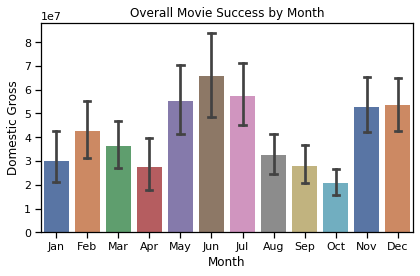

In [125]:
# this graph shows us that the domestic gross varies by month for movies overall

sns.set_context('notebook')

sns.barplot(x='month', y="domestic_gross", 
            data = merged_df, capsize=.2, 
            palette="deep").set(title = 'Overall Movie Success by Month', 
                                xticklabels = tick_label_list,
                               xlabel = 'Month',
                               ylabel = 'Domestic Gross')
plt.tight_layout()
plt.show()

In [234]:
# obtain top 6 genres with the most movies, obrain a list with those genres

sum_dict = dict(zip(merged_df.columns[-21:], merged_df.sum()['Adventure':]))

sorted_dict = sorted(sum_dict.items(), key=operator.itemgetter(1), reverse = True)

top_six = sorted_dict[:6]

top_six_genre_list = []
for item in top_six:
    top_six_genre_list.append(item[0])
    
top_six_genre_list

['Drama', 'Comedy', 'Action', 'Adventure', 'Romance', 'Thriller']

In [256]:
# create dataframe that only has movies that are in these six genres

six_genres_df = merged_df.loc[(merged_df['Drama'] == 1) | (merged_df['Comedy'] == 1) | 
                             (merged_df['Action'] == 1) | (merged_df['Adventure'] == 1) | 
                             merged_df['Thriller'] == 1 | (merged_df['Romance'] == 1)]

In [257]:
# create dataframe of the domestic grosses for the top six genres

data_genres = [pd.Series(drama_df['domestic_gross']), pd.Series(comedy_df['domestic_gross']), 
               pd.Series(action_df['domestic_gross']), pd.Series(adventure_df['domestic_gross']), 
               pd.Series(romance_df['domestic_gross']), pd.Series(thriller_df['domestic_gross'])]
data = dict(zip(top_six_genre_list, data_genres))
dom_gross_genre_df = pd.DataFrame(data)

# add column for dataframe to merge on

dom_gross_genre_df['title'] = six_genres_df['title']

# rename columns to prep for merge
dom_gross_genre_df.rename(columns = {'Drama':'drama_gross', 'Comedy':'comedy_gross', 
                                     'Action':'action_gross', 'Adventure': 'adventure_gross', 
                                     'Romance': 'romance_gross', 'Thriller': 'thriller_gross'}, inplace = True)

In [261]:
# merge dataframes

six_genres_df = pd.merge(six_genres_df, dom_gross_genre_df, on = 'title')

In [266]:
# melt dataframe so we can see divide data by genre

by_genre_df = pd.melt(six_genres_df, id_vars=['studio', 'month', 'day'], 
                      value_vars=['drama_gross', 'comedy_gross', 'action_gross', 
                                  'adventure_gross', 'romance_gross', 'thriller_gross'])
by_genre_df.head()

,studio,month,day,variable,value
0,BV,6,mid,drama_gross,NaN
1,WB,7,mid,drama_gross,NaN
2,P/DW,5,mid,drama_gross,NaN
3,Sum.,6,end,drama_gross,300500000.0
4,Par.,5,beg,drama_gross,NaN


In [302]:
# rename variable and value columns so that they make more sense

by_genre_df = by_genre_df.rename(columns = {'variable':'genre', 'value': 'domestic_gross'})

In [305]:
# drop NaN values for the domestic gross column just to clean up this dataset

by_genre_df.dropna(subset=['domestic_gross'], inplace = True)

In [318]:
by_genre_df['genre'].value_counts()

drama_gross        1026
comedy_gross        632
action_gross        407
adventure_gross     343
romance_gross       288
thriller_gross      287
Name: genre, dtype: int64

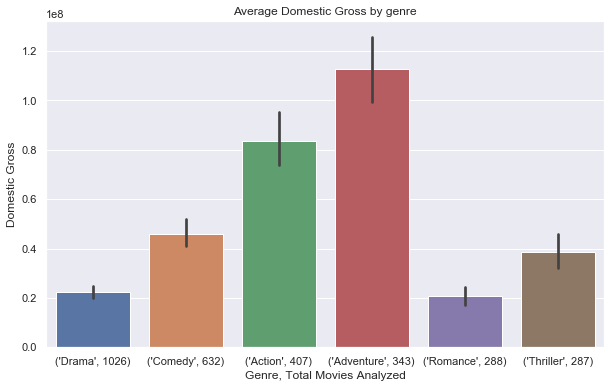

In [383]:
# see overall success by genre

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'genre', y = 'domestic_gross', 
            data = by_genre_df, palette = 'deep').set(title = 'Average Domestic Gross by genre',
                                                      xticklabels = list(zip(top_six_genre_list, by_genre_df['genre'].value_counts())),ylabel = 'Domestic Gross',
                                   xlabel = 'Genre, Total Movies Analyzed')

plt.savefig('Average_dom_gross_by_genre.png')
plt.show()

In [325]:
# to keep future graphs less busy, we'll focus on the top three

three_top_df = by_genre_df.loc[(by_genre_df['genre'] == 'action_gross') | 
                               (by_genre_df['genre'] == 'adventure_gross') |
                               (by_genre_df['genre'] == 'comedy_gross')]

In [330]:
# obtain top five studios

three_top_df['studio'].value_counts()[:5]

Fox     144
Uni.    137
BV      114
WB      107
Sony     90
Name: studio, dtype: int64

In [331]:
# create dataframe that only has these top five studios to make a clearer graph

top_five_studios_df = three_top_df.loc[(three_top_df['studio'] == 'Uni.') | (three_top_df['studio'] == 'Fox') | 
                                 (three_top_df['studio'] == 'WB') | (three_top_df['studio'] == 'Sony') | 
                                 (three_top_df['studio'] == 'BV')]

In [372]:
# create table of studio earnings subdivided by genre, suppress scientific notation to make the table more readable

studio_genre_table = top_five_studios_df.groupby(['studio', 'genre']).describe()['domestic_gross']
pd.set_option('display.float_format', '{:.2f}'.format)

export_csv = studio_genre_table.to_csv('studio_genre_table.csv', index= None, header = True)

count         mean          std         min  \
studio genre                                                          
BV     action_gross     27.00 248196296.30 189110668.62 27600000.00   
       adventure_gross  51.00 215531372.55 166615261.59 12400000.00   
       comedy_gross     36.00 159230555.56 127660101.88 10100000.00   
Fox    action_gross     42.00 105592857.14  78513952.13 12700000.00   
       adventure_gross  49.00 116336734.65  72208960.94 12700000.00   
       comedy_gross     53.00  79350943.36  68601467.86  3700000.00   
Sony   action_gross     29.00 121682758.59  99735060.01 20300000.00   
       adventure_gross  24.00 127429166.67 105427215.69 34300000.00   
       comedy_gross     37.00  94943243.19  69765916.30 21100000.00   
Uni.   action_gross     46.00  89135260.87 112384421.90    22000.00   
       adventure_gross  32.00 124065625.00 150439786.71  2200000.00   
       comedy_gross     59.00  94886440.68  87743457.28  4400000.00   
WB     action_gross     42.00 129909523.81 121489312.61  3700000.00   
       adventure_gross  34.00 132023529.41 107407254.03 17500000.00   
       comedy_gross     31.00  68303225.81  49909514.68  1800000.00   

                               25%          50%          75%          max  
studio genre                                                               
BV     action_gross    90050000.00 216600000.00 324150000.00 700100000.00  
       adventure_gross 88950000.00 200800000.00 264150000.00 700100000.00  
       comedy_gross    51725000.00 140450000.00 221775000.00 486300000.00  
Fox    action_gross    50425000.00  81650000.00 146050000.00 363100000.00  
       adventure_gross 64099999.00 107500000.00 146900000.00 363100000.00  
       comedy_gross    36700000.00  60300000.00 100200000.00 363100000.00  
Sony   action_gross    50700000.00  78700000.00 176600000.00 404500000.00  
       adventure_gross 46650000.00  83100000.00 175650000.00 404500000.00  
       comedy_gross    45300000.00  78700000.00 119800000.00 404500000.00  
Uni.   action_gross    29475000.00  65950000.00 104025000.00 652300000.00  
       adventure_gross 36450000.00  64950000.00 128425000.00 652300000.00  
       comedy_gross    36350000.00  65000000.00 117900000.00 368400000.00  
WB     action_gross    40300000.00  85000000.00 182125000.00 448100000.00  
       adventure_gross 49475000.00 100350000.00 165975000.00 412600000.00  
       comedy_gross    37650000.00  54700000.00  85650000.00 254500000.00

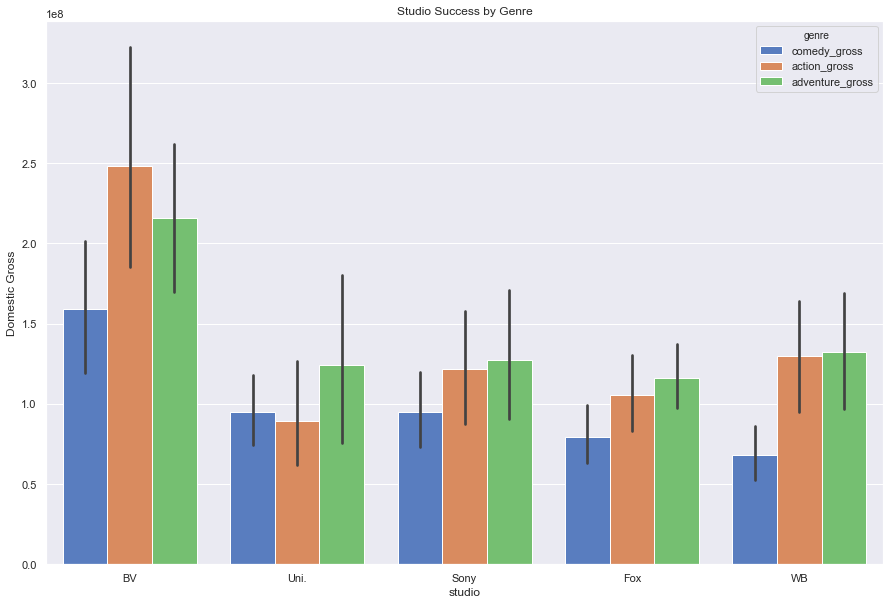

In [384]:
# graph representing info in table above

f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x="studio", y="domestic_gross", hue="genre", data=top_five_studios_df,
                palette="muted").set(title = 'Studio Success by Genre', ylabel = 'Domestic Gross')
plt.savefig('Studio_success_by_genre.png')

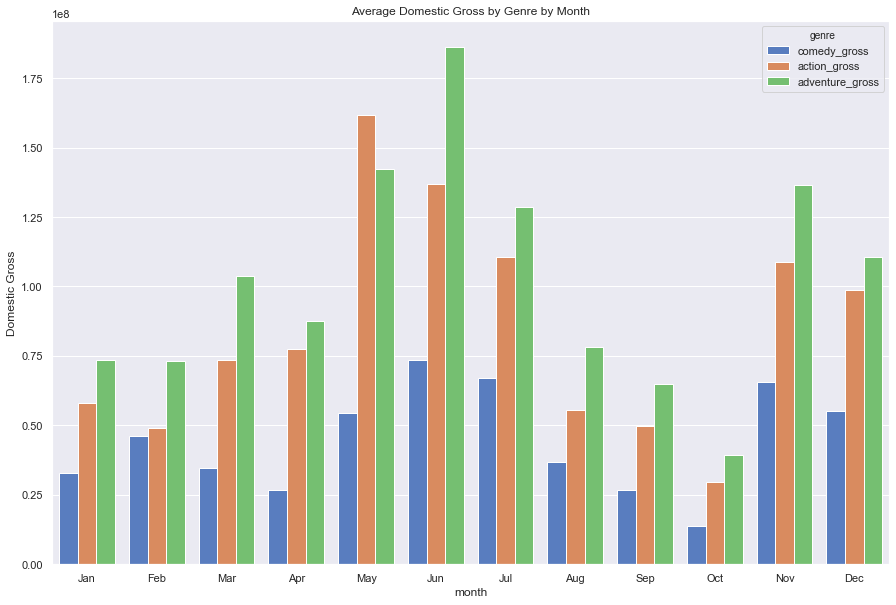

In [385]:
# determine genre success by month

f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x="month", y="domestic_gross", hue="genre", 
                 data=three_top_df, palette="muted", ci=None).set(title = 'Average Domestic Gross by Genre by Month', 
                                                                  xticklabels = tick_label_list, ylabel = 'Domestic Gross')
plt.savefig('Success_by_month.png')

In [378]:
# see when in the month which genres do best

top_five_studios_df.groupby(['genre', 'day']).describe()['domestic_gross']

count         mean          std         min         25%  \
genre           day                                                            
action_gross    beg  55.00 146458181.82 114681091.94  9500000.00 56200000.00   
                end  57.00 123392982.46 125671777.52  4400000.00 38400000.00   
                mid  74.00 123416513.50 143365905.60    22000.00 38225000.00   
adventure_gross beg  61.00 166560655.72 123828190.49 12700000.00 56100000.00   
                end  67.00 127562686.55 116828319.84  2200000.00 49800000.00   
                mid  62.00 153272580.65 152765288.92 16000000.00 58525000.00   
comedy_gross    beg  59.00 110023728.80 106504377.99  1800000.00 40850000.00   
                end  79.00  86691139.23  70494684.64  3700000.00 32350000.00   
                mid  78.00 100339743.56  90358673.95  7200000.00 41225000.00   

                             50%          75%          max  
genre           day                                         
action_gross    beg 110800000.00 211500000.00 459000000.00  
                end  90800000.00 159600000.00 678800000.00  
                mid  69700000.00 144775000.00 700100000.00  
adventure_gross beg 126500000.00 259800000.00 459000000.00  
                end  90800000.00 173800000.00 678800000.00  
                mid  98950000.00 179400000.00 700100000.00  
comedy_gross    beg  67000000.00 124699999.50 389800000.00  
                end  65000000.00 121450000.00 270400000.00  
                mid  76950000.00 130700000.00 486300000.00

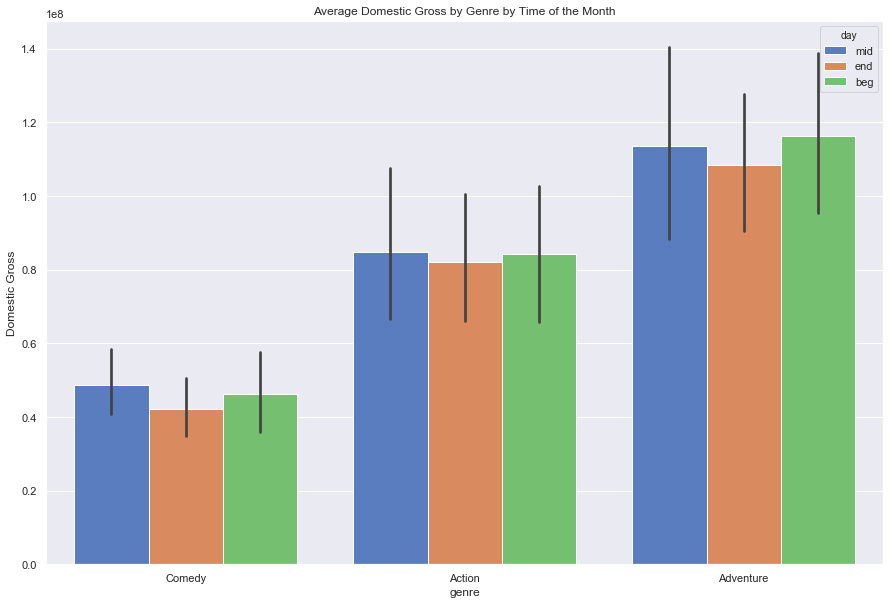

In [386]:
# graph this data, showing that the middle and beginning of the month are the best time for movie release, 
# but this advantange is so minimal that it shouldn't be a huge concern for the investor

f, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(x="genre", y="domestic_gross", hue="day", 
                 data=three_top_df, palette="muted").set(title = 'Average Domestic Gross by Genre by Time of the Month',
                                                                  xticklabels = ['Comedy', 'Action', 'Adventure'], 
                                                                  ylabel = 'Domestic Gross')
plt.savefig('Success_by_time_of_month.png')

In [381]:
export_csv = three_top_df.to_csv ('top_three_genres.csv', index = None, header=True)

In [382]:
export_csv = top_five_studios_df.to_csv('top_five_studios.csv', index= None, header = True)